In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv("Salary_Data.csv")

# Checking for null values.
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


<AxesSubplot:>

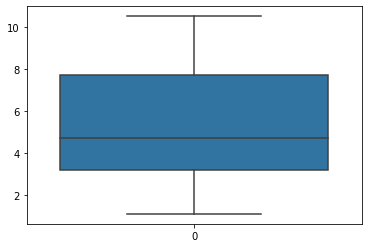

In [4]:
sns.boxplot(data=df["YearsExperience"])

<AxesSubplot:>

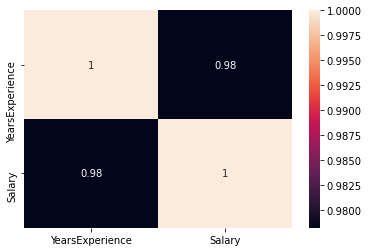

In [5]:
# Checking for correlation between label and features.

sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

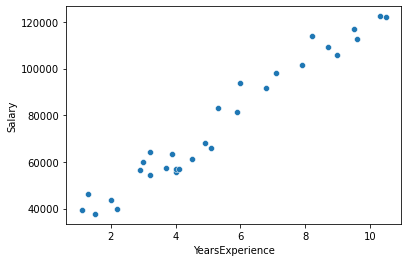

In [6]:
sns.scatterplot(x="YearsExperience",y="Salary",data=df)

In [7]:
# Building a regression model.

model_1 = smf.ols("Salary~YearsExperience",data=df).fit()
model_1.rsquared
# Scince r2 is already a high enough value we accept this model.

0.9569566641435086

<AxesSubplot:xlabel='Salary', ylabel='YearsExperience'>

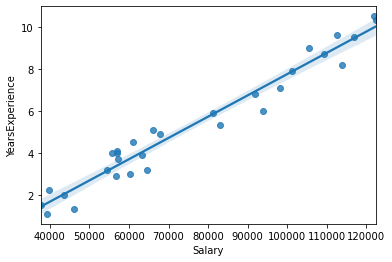

In [8]:
sns.regplot(x="Salary",y="YearsExperience",data=df)

In [9]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 26 Jan 2022   Prob (F-statistic):           1.14e-20
Time:                        00:41:54   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
model_1_pred = model_1.predict(df["YearsExperience"])

In [11]:
df1 = df

In [12]:
df1["x2"] = df1.YearsExperience**2
df1["x3"] = df1.YearsExperience**3
df1.head(2)

,YearsExperience,Salary,x2,x3
0,1.1,39343.0,1.21,1.331
1,1.3,46205.0,1.69,2.197


In [13]:
# Applying polynomial transformation.

model_2 = smf.ols("Salary~YearsExperience+x2+x3",data=df1).fit()
model_2.rsquared

0.9635969766249464

In [14]:
df2 = df1.drop("Salary",axis=1)

In [15]:
predictions = model_2.predict(df2)

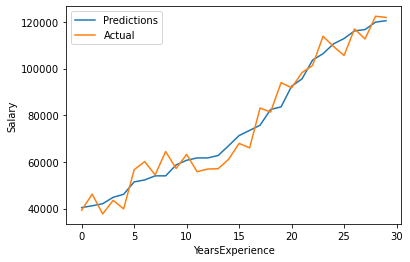

In [16]:
plt.plot(predictions,label='Predictions')
plt.plot(df1["Salary"],label='Actual')
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.legend()

In [17]:
# Applying log transformation.

log_model=smf.ols("Salary~np.log(YearsExperience)", data=df).fit()
log_model.summary()

# Value of r2 actually gets reduced while AIC value increases hence not a useful model.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Wed, 26 Jan 2022   Prob (F-statistic):           3.25e-13
Time:                        00:41:54   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
log_predictions=log_model.predict(df['YearsExperience'])

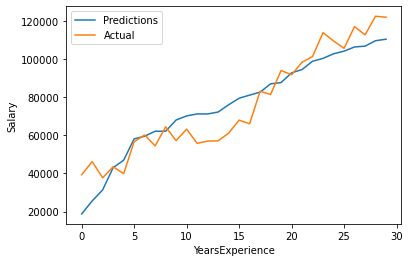

In [19]:
plt.plot(log_predictions,label='Predictions')
plt.plot(df1["Salary"],label='Actual')
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.legend()

# We can see how the distance varies inconsitenty between the two lines
# Meaning we are getting some errors in our prediction.